# PIP INSTALL AND IMPORT MODULE

In [ ]:
!pip install datasets evaluate transformers[torch] accelerate -U

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 493.7/493.7 kB 8.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.1/84.1 kB 8.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.7/7.7 MB 37.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 261.0/261.0 kB 28.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.3/115.3 kB 16.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 16.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.0/302.0 kB 39.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.8/3.8 MB 72.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 74.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 295.0/295.0 kB 32.0 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from bs4 import BeautifulSoup

from datasets import DatasetDict, Dataset
from sklearn.model_selection import train_test_split
from pydrive.auth import GoogleAuth
from google.colab import drive
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
import ast

# We can see all columns in df.head() / and .tail()
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 1000)
# pd.set_option('display.max_colwidth', None)

In [ ]:
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

#this link
file_id = '1i5-lhcT6N2IOhTmKmfTaJmvSSQkgsFKA'

#298A link
# file_id = '1k6vFnOwLBB_wlWOL57lkzorqQ2Q89XG_' #<-- You add in here the id from you google drive file, you can find it
download = drive.CreateFile({'id': file_id})

# Download the file to a local disc
download.GetContentFile('tokenized_df.csv')

# PREPROCESSING


In [ ]:
df = pd.read_csv('tokenized_df.csv', engine='python')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 546785 entries, 0 to 546784
Data columns (total 4 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   content_text    546785 non-null  object
 1   input_ids       546785 non-null  object
 2   attention_mask  546785 non-null  object
 3   targets         546785 non-null  int64 
dtypes: int64(1), object(3)
memory usage: 16.7+ MB


In [ ]:
df.head()

,content_text,input_ids,attention_mask,targets
0,Wall St. Pullback Reflects Tech Blowout (Reute...,"[101, 2813, 2358, 1012, 4139, 5963, 11138, 662...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...",0
1,Wall St. Bears Claw Back Into the Black (Reute...,"[101, 2813, 2358, 1012, 6468, 15020, 2067, 204...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...",0
2,Oil and Economy Cloud Stocks' Outlook (Reuters...,"[101, 3514, 1998, 4610, 6112, 15768, 1005, 176...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...",0
3,Iraq Halts Oil Exports from Main Southern Pipe...,"[101, 5712, 9190, 2015, 3514, 14338, 2013, 236...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...",0
4,"Stocks End Up, But Near Year Lows (Reuters) Re...","[101, 15768, 2203, 2039, 1010, 2021, 2379, 209...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...",0


In [ ]:
df.rename(columns={'content_text': 'text', 'targets':'label'}, inplace=True)
df = df[['text', 'label', 'input_ids', 'attention_mask']]

In [ ]:
df['input_ids'] = df['input_ids'].apply(lambda x: ast.literal_eval(x))
df['attention_mask'] = df['attention_mask'].apply(lambda x: ast.literal_eval(x))

In [ ]:
train_df, test_df = train_test_split(df, test_size=0.3, random_state=42)
test_df, val_df = train_test_split(test_df, test_size=0.5, random_state=42)
train_df.reset_index(drop=True,inplace=True)
test_df.reset_index(drop=True,inplace=True)
val_df.reset_index(drop=True,inplace=True)

In [ ]:
train_df.head()

,text,label,input_ids,attention_mask
0,Wall St. Pullback Reflects Tech Blowout (Reute...,0,"[101, 2813, 2358, 1012, 4139, 5963, 11138, 662...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ..."
1,Wall St. Bears Claw Back Into the Black (Reute...,0,"[101, 2813, 2358, 1012, 6468, 15020, 2067, 204...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ..."
2,Oil and Economy Cloud Stocks' Outlook (Reuters...,0,"[101, 3514, 1998, 4610, 6112, 15768, 1005, 176...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ..."
3,Iraq Halts Oil Exports from Main Southern Pipe...,0,"[101, 5712, 9190, 2015, 3514, 14338, 2013, 236...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ..."
4,"Stocks End Up, But Near Year Lows (Reuters) Re...",0,"[101, 15768, 2203, 2039, 1010, 2021, 2379, 209...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ..."


In [ ]:
val_df.head()

,text,label,input_ids,attention_mask
0,Census Bureau admits privacy breach (AP) ...,1,"[101, 2883, 4879, 14456, 9394, 12510, 1006, 97...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ..."
1,"Sony to show ""Home,"" ends wait on PS3 Web stra...",1,"[101, 8412, 2000, 2265, 1000, 2188, 1010, 1000...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ..."
2,Worldbeat: Now it's the ads that zap viewers ...,1,"[101, 2088, 19442, 1024, 2085, 2009, 1005, 105...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ..."
3,Video game: `Crackdown' packs a punch (AP...,1,"[101, 2678, 2208, 1024, 1036, 8579, 7698, 1005...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ..."
4,Early birds: Why small was beautiful for dino ...,1,"[101, 2220, 5055, 1024, 2339, 2235, 2001, 3376...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ..."


In [ ]:
test_df.head()

,text,label,input_ids,attention_mask
0,Best Buy Profits Rise 8.7 Percent MINNEAPOL...,1,"[101, 2190, 4965, 11372, 4125, 1022, 1012, 102...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ..."
1,Times Ends Fee on TimesSelect Content New Y...,1,"[101, 2335, 4515, 7408, 2006, 2335, 11246, 224...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ..."
2,DHS 'Dry Run' Support Cited In the weeks be...,1,"[101, 28144, 2015, 1005, 4318, 2448, 1005, 249...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ..."
3,Lehman net falls on writedowns NEW YORK (Re...,0,"[101, 28444, 5658, 4212, 2006, 4339, 7698, 201...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ..."
4,Health Care Spending Highest in Northeast W...,0,"[101, 2740, 2729, 5938, 3284, 1999, 4794, 2899...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ..."


In [ ]:
train_df.head()

,text,label,input_ids,attention_mask
0,Wall St. Pullback Reflects Tech Blowout (Reute...,0,"[101, 2813, 2358, 1012, 4139, 5963, 11138, 662...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ..."
1,Wall St. Bears Claw Back Into the Black (Reute...,0,"[101, 2813, 2358, 1012, 6468, 15020, 2067, 204...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ..."
2,Oil and Economy Cloud Stocks' Outlook (Reuters...,0,"[101, 3514, 1998, 4610, 6112, 15768, 1005, 176...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ..."
3,Iraq Halts Oil Exports from Main Southern Pipe...,0,"[101, 5712, 9190, 2015, 3514, 14338, 2013, 236...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ..."
4,"Stocks End Up, But Near Year Lows (Reuters) Re...",0,"[101, 15768, 2203, 2039, 1010, 2021, 2379, 209...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ..."


In [ ]:
train = Dataset.from_pandas(train_df)
test = Dataset.from_pandas(test_df)
validation = Dataset.from_pandas(val_df)
transformed_dataset = DatasetDict({'train': train, 'validation': validation,'test': test})

In [ ]:
print(transformed_dataset)

DatasetDict({
    train: Dataset({
        features: ['text', 'label', 'input_ids', 'attention_mask'],
        num_rows: 382749
    })
    validation: Dataset({
        features: ['text', 'label', 'input_ids', 'attention_mask'],
        num_rows: 82018
    })
    test: Dataset({
        features: ['text', 'label', 'input_ids', 'attention_mask'],
        num_rows: 82018
    })
})


# Baseline Evaluating

In [ ]:
import torch

if torch.cuda.is_available():
    device = torch.device("cuda")
    print(f"Using {torch.cuda.get_device_name(0)}")
else:
    device = torch.device("cpu")
    print("Using CPU")

Using Tesla T4


In [ ]:
from transformers import AutoTokenizer, ErnieForSequenceClassification
import torch
from torch.utils.data import DataLoader
from datasets import load_dataset

id2label = {0:"Business", 1:"Sci/Tech", 2:"Entertainment", 3:"Sports", 4:"World"}
label2id = {"Business":0, "Sci/Tech":1, "Entertainment":2, "Sports":3, "World":4}

basemodel = "nghuyong/ernie-2.0-base-en"
tokenizer = AutoTokenizer.from_pretrained(basemodel)
model = ErnieForSequenceClassification.from_pretrained(basemodel, num_labels=5, id2label=id2label, label2id=label2id)

model = model.to(device)

Some weights of ErnieForSequenceClassification were not initialized from the model checkpoint at nghuyong/ernie-2.0-base-en and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:
def classify_text(batch):
    inputs = tokenizer(batch["text"], return_tensors="pt", padding=True, truncation=True, max_length=512)
    inputs = {key: val.to(device) for key, val in inputs.items()}  # Move inputs to GPU

    with torch.no_grad():
        outputs = model(
            input_ids=inputs["input_ids"],
            attention_mask=inputs["attention_mask"]
        )
    logits = outputs.logits.cpu()  # Move logits to CPU

    predicted_labels = torch.argmax(logits, dim=1)
    return {"predicted_labels": predicted_labels}

results = transformed_dataset["validation"].map(classify_text, batched=True, batch_size=16)

Map:   0%|          | 0/82018 [00:00<?, ? examples/s]

In [ ]:
predicted_labels = results["predicted_labels"]
reference_labels = transformed_dataset["validation"]["label"]

In [ ]:
from sklearn.metrics import accuracy_score, precision_recall_fscore_support
accuracy = accuracy_score(reference_labels, predicted_labels)
precision, recall, f1, _ = precision_recall_fscore_support(reference_labels, predicted_labels, average='weighted')

print(f'Accuracy: {accuracy:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1 Score: {f1:.4f}')

Accuracy: 0.1906
Precision: 0.1710
Recall: 0.1906
F1 Score: 0.0798


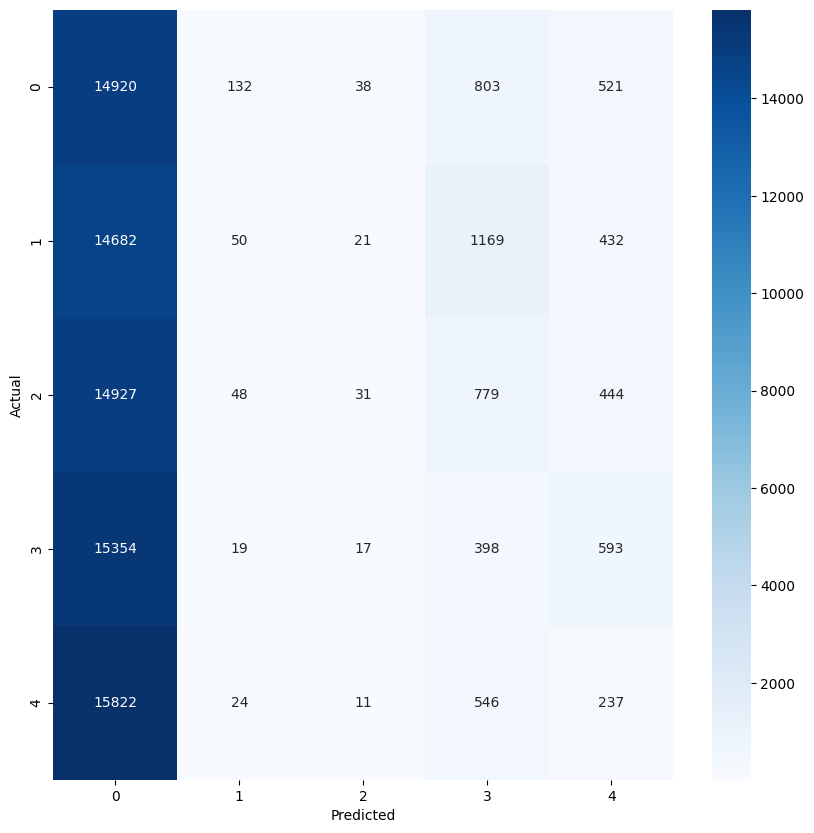

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt


cm = confusion_matrix(reference_labels, predicted_labels)

# Plot confusion matrix
plt.figure(figsize=(10,10))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()